In [13]:
# %pip install statsmodels
# %pip install patsy


In [14]:
import pandas as pd 
import math
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestRegressor




# df = pd.read_csv('data/2019 Line 280 AVL allscripts.csv')
df = pd.read_csv('data/2019 Silver Streak allscripts.csv')

df = df.replace(',','', regex=True)
df['Actual Depart Hour'] = df['Actual Arrival'].str.split(':',expand=True)[0]
df['Actual Depart Hour'] = df['Actual Depart Hour'].astype(int)
df['Transit Date Month'] = df['Transit Date'].str.split('/',expand=True)[0]
df['Transit Date Month'] = df['Transit Date Month'].astype(int)

/Users/jairadhakrishnan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_85457/3547566767.py:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(['Transit Date', 'Block #', 'Stop Sequence','Latitude','Longitude',\
/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_85457/3547566767.py:60: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df1.drop(['Difference (Minutes)'],1)


CPU times: user 1min 27s, sys: 411 ms, total: 1min 27s
Wall time: 1min 28s


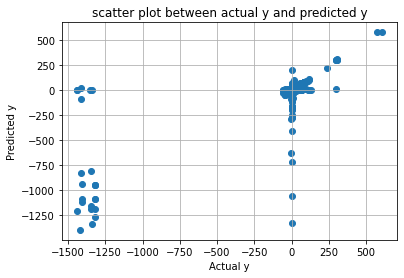

Root Mean Squared Error : 13.81067262466011
Mean Absolute Error : 1.5833947587799007
[0.29661055 0.08809279 0.28123228 0.78694801 0.01638813]
0.29 accuracy with a standard deviation of 0.27


In [15]:
# df1 = df.copy()
# df1 = df.loc[(df['Bus Stop ID'] == 775) | (df['Bus Stop ID'] == 782) | (df['Bus Stop ID'] == 733)]
# df1 = df.loc[(df['Bus Stop ID'] != 177)]
# df1 = df1.loc[(df1['Bus Stop ID'] != 738)]
# df1 = df1.loc[(df1['Bus Stop ID'] != 2199)]
# df1 = df1.loc[(df1['Bus Stop ID'] != 2384)]


############## Line 280 ###############

# df1 = pd.get_dummies(df, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week', \
#     'Miles from Prior Time Point', 'Bus Stop ID', 'Badge #'],prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_',\
#         'Enc_Miles_', 'Enc_Stop_', 'Enc_Badge_'])


# df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
#     'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
#         'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
#             'Dwell Time', 'Actual Run Time', 'Scheduled Operating Speed','Actual Operating Speed',\
#                 'Run Time Variance','Day Type','Time Period', 'Scheduled Run Time',\
#                         'Scheduled Depart DateTime', 'Actual Depart DateTime', \
#                             'Same Stop Prev Trip Departure Offset'\
#                                 ], 1, inplace=True)

######################################





############## Silver Streak ###############


df1 = pd.get_dummies(df, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week', \
    'Miles from Prior Time Point'],prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_',\
        'Enc_Miles_'])
# df1 = pd.get_dummies(df1, columns=['Transit Date Month'],prefix=['Enc_Month_'])

# df1['Transit Date Month'] = df1['Transit Date'].str.split('/',expand=True)[0]
df1.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df1['Difference (Minutes)'] = df1['Difference (Minutes)'].astype(int)
df1['Prev Departure Offset'] = df1['Prev Departure Offset'].astype(int)
# df1['Transit Date Month'] = df1['Transit Date Month'].astype(int)

# df.replace('?', -99999, inplace=True) #sees -99999 as outlier, ignores it

df1.drop(['Transit Date', 'Block #', 'Stop Sequence','Latitude','Longitude',\
        'Actual Arrival', 'Dwell Time', 'Actual Run Time',\
                'Actual Arrival DateTime', \
                            'Same Stop Prev Trip Departure Offset'\
                                ], 1, inplace=True)

######################################


# print(df1.head)
# pd.to_numeric(df1['Actual Operating Speed'], errors='coerce')
df2 = df1.drop(['Difference (Minutes)'],1)
X = np.array(df2) #using everything except class to train
Y = np.array(df1['Difference (Minutes)']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

# clf = SGDRegressor(loss='huber', penalty='l1')
# clf = SGDRegressor(loss='huber', penalty='elasticnet')
# clf = XGBClassifier(subsample = 0.7, max_depth = 4)
# clf = DecisionTreeClassifier(criterion="entropy", splitter="random")
# clf = DecisionTreeRegressor()
clf = RandomForestRegressor(n_estimators = 50)

%time clf.fit(X_train, Y_train)

filename = 'models/2019_clf_model_9_15.sav'
pickle.dump(clf, open(filename, 'wb'))

plt.scatter(Y_test, clf.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Root Mean Squared Error :',math.sqrt(mean_squared_error(Y_test, clf.predict(X_test))))
print('Mean Absolute Error :',mean_absolute_error(Y_test, clf.predict(X_test)))

scores = cross_val_score(clf, X_test, Y_test, cv=5)

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4), sharey=True)
# ax.plot(X_train, clf.fit(X_train, Y_train).predict(X_train), lw=2)
# ax.scatter(X_train[clf.support_], Y_train[clf.support_], facecolor="none",s=50)
# # ax.scatter(X_test[np.setdiff1d(np.arange(len(X_test)),clf.support_)],
# #            Y_test[np.setdiff1d(np.arange(len(X_test)), clf.support_)],
# #            facecolor="none", edgecolor="k", s=50)


# fig.text(0.5, 0.04, 'data', ha='center', va='center')
# fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
# fig.suptitle("Support Vector Regression", fontsize=14)
# plt.show()

In [16]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df2.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Prev Departure Offset Importance: 0.36
Variable: Badge #              Importance: 0.19
Variable: Scheduled Run Time   Importance: 0.08
Variable: Enc_Month__11        Importance: 0.04
Variable: Enc_Month__12        Importance: 0.04
Variable: Enc_Month__6         Importance: 0.03
Variable: Enc_Month__10        Importance: 0.03
Variable: Enc_Day__Tuesday     Importance: 0.03
Variable: Enc_Miles__39.09     Importance: 0.03
Variable: Enc_Day__Monday      Importance: 0.02
Variable: Enc_Miles__8.531     Importance: 0.02
Variable: Bus Stop ID          Importance: 0.01
Variable: Enc_Hour__2          Importance: 0.01
Variable: Enc_Hour__4          Importance: 0.01
Variable: Enc_Month__3         Importance: 0.01
Variable: Enc_Month__5         Importance: 0.01
Variable: Enc_Day__Friday      Importance: 0.01
Variable: Enc_Day__Sunday      Importance: 0.01
Variable: Enc_Day__Thursday    Importance: 0.01
Variable: Enc_Day__Wednesday   Importance: 0.01
Variable: Enc_Miles__21.067    Importan

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:

# df1 = df.copy()
# df1 = df.loc[(df['Bus Stop ID'] == 775) | (df['Bus Stop ID'] == 782) | (df['Bus Stop ID'] == 733)]





#################################################################################
# df1 = df.loc[(df['Bus Stop ID'] != 177)]
# df1 = df1.loc[(df1['Bus Stop ID'] != 738)]
# df1 = df1.loc[(df1['Bus Stop ID'] != 2199)]
# df1 = df1.loc[(df1['Bus Stop ID'] != 2384)]

# df1 = pd.get_dummies(df1, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week', \
#     'Miles from Prior Time Point', 'Bus Stop ID'],prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_',\
#         'Enc_Miles_', 'Enc_Stop_'])
# # df1 = pd.get_dummies(df1, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week', \
# #     'Miles from Prior Time Point'],prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_',\
# #         'Enc_Miles_'])
# # df1 = pd.get_dummies(df1, columns=['Transit Date Month'],prefix=['Enc_Month_'])

# # df1['Transit Date Month'] = df1['Transit Date'].str.split('/',expand=True)[0]
# df1.fillna(value = -9999)
# enc = OneHotEncoder(handle_unknown='ignore')

# df1['Difference (Minutes)'] = df1['Difference (Minutes)'].astype(int)
# df1['Prev Departure Offset'] = df1['Prev Departure Offset'].astype(int)
# # df1['Transit Date Month'] = df1['Transit Date Month'].astype(int)

# # df.replace('?', -99999, inplace=True) #sees -99999 as outlier, ignores it
# df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
#     'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
#         'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
#             'Dwell Time', 'Actual Run Time', 'Scheduled Operating Speed','Actual Operating Speed',\
#                 'Run Time Variance','Day Type','Time Period', 'Scheduled Run Time',\
#                         'Scheduled Depart DateTime', 'Actual Depart DateTime', \
#                             'Same Stop Prev Trip Departure Offset'\
#                                 ], 1, inplace=True)
# print(df1.head)
# # pd.to_numeric(df1['Actual Operating Speed'], errors='coerce')
# X = np.array(df1.drop(['Difference (Minutes)'],1)) #using everything except class to train
# Y = np.array(df1['Difference (Minutes)']) #class is the final result obviously
# np.nan_to_num(X)
# np.nan_to_num(Y)
# pd.isnull(X)
# np.nan_to_num(X)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# clf = svm.SVR()
# %time clf.fit(X_train, Y_train)

# scores = cross_val_score(clf, X_test, Y_test, cv=5)

# print(scores)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#################################################################################





# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4), sharey=True)
# ax.plot(X_train, clf.fit(X_train, Y_train).predict(X_train), lw=2)
# ax.scatter(X_train[clf.support_], Y_train[clf.support_], facecolor="none",s=50)
# # ax.scatter(X_test[np.setdiff1d(np.arange(len(X_test)),clf.support_)],
# #            Y_test[np.setdiff1d(np.arange(len(X_test)), clf.support_)],
# #            facecolor="none", edgecolor="k", s=50)


# fig.text(0.5, 0.04, 'data', ha='center', va='center')
# fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
# fig.suptitle("Support Vector Regression", fontsize=14)
# plt.show()

In [18]:
df1 = df.copy()


# df1 = pd.get_dummies(df1, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week']\
#     ,prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_'])

df1.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df1['Scheduled Run Time'] = df1['Scheduled Run Time'].astype(int)
df1['Actual Run Time'] = df1['Actual Run Time'].astype(int)

df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',\
       'Actual Depart Hour', 'Transit Date Month', 'Day of Week',\
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset'], 1, inplace=True)
# print(df1.head)
X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df1['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

clf = SGDRegressor(loss='huber')
%time clf.fit(X_train, Y_train)

filename = 'models/2019_clf_model_9_15.sav'
pickle.dump(clf, open(filename, 'wb'))

plt.scatter(Y_test, clf.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Root Mean Squared Error :',math.sqrt(mean_squared_error(Y_test, clf.predict(X_test))))
print('Mean Absolute Error :',mean_absolute_error(Y_test, clf.predict(X_test)))

scores = cross_val_score(clf, X_test, Y_test, cv=5)

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4), sharey=True)
# ax.plot(X_train, clf.fit(X_train, Y_train).predict(X_train), lw=2)
# ax.scatter(X_train[clf.support_], Y_train[clf.support_], facecolor="none",s=50)
# # ax.scatter(X_test[np.setdiff1d(np.arange(len(X_test)),clf.support_)],
# #            Y_test[np.setdiff1d(np.arange(len(X_test)), clf.support_)],
# #            facecolor="none", edgecolor="k", s=50)


# fig.text(0.5, 0.04, 'data', ha='center', va='center')
# fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
# fig.suptitle("Support Vector Regression", fontsize=14)
# plt.show()

/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_85457/2841088066.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\


KeyError: "['Vehicle #' 'Route #' 'Trip #' 'Direction' 'Pattern' 'Bus Stop Name'\n 'Scheduled Depart' 'Actual Depart' 'Initial Performance Result'\n 'Reported Performance Results' 'Waivers' 'Scheduled Operating Speed'\n 'Actual Operating Speed' 'Run Time Variance' 'Day Type' 'Time Period'\n 'Scheduled Depart DateTime' 'Actual Depart DateTime'] not found in axis"

/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_5584/1102843367.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set(Title="2019 Bus Run Time Correlation with Scheduled Run Time")
No handles with labels found to put in legend.


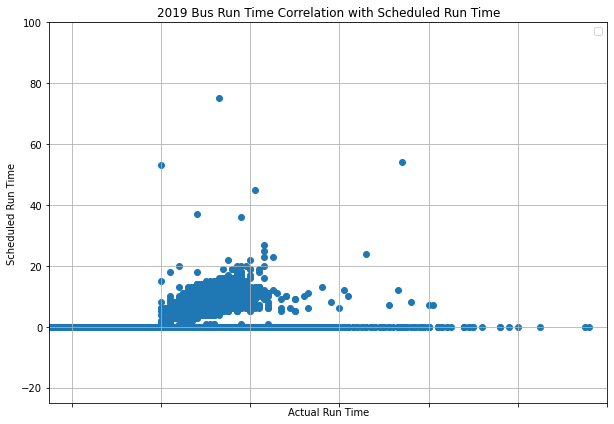

0.9794987697434446

In [ ]:
stopactual = df
stopactual['Actual Run Time'] = stopactual['Actual Run Time'].astype(int)
stopactual['Scheduled Run Time'] = stopactual['Scheduled Run Time'].astype(int)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(111)
ax1.set_xlim(left = -25,right=100)
ax1.set_ylim(bottom=-25,top=100)
ax1.set(Title="2019 Bus Run Time Correlation with Scheduled Run Time")
# plt.ylim(0,15)
ax1.scatter(stopactual['Actual Run Time'], stopactual['Scheduled Run Time'])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()

ax1.set(xlabel="Actual Run Time")
ax1.set(ylabel="Scheduled Run Time")

locs, labels = plt.xticks() 



plt.show()

df['Actual Run Time'].corr(df['Scheduled Run Time'])

In [ ]:
print(df.loc[df['Run Time Variance']==0].shape[0]/df.shape[0])

0.4404011588595006


/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_5584/3822435881.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_5584/3822435881.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train


CPU times: user 284 ms, sys: 4.56 ms, total: 289 ms
Wall time: 289 ms


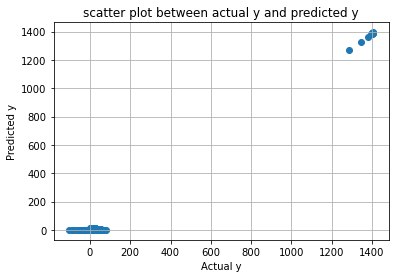

Root Mean Squared Error : 5.632380996812521
Mean Absolute Error : 2.793087423723068
[0.88657768 0.93884594 0.93383907 0.97250913 0.97448155]
0.94 accuracy with a standard deviation of 0.03


In [ ]:
df1 = df.copy()


df1 = pd.get_dummies(df1, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week']\
    ,prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_'])

df1.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df1['Scheduled Run Time'] = df1['Scheduled Run Time'].astype(int)
df1['Actual Run Time'] = df1['Actual Run Time'].astype(int)

df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset'], 1, inplace=True)
X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df1['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

clf = SGDRegressor(loss='huber')
%time clf.fit(X_train, Y_train)



plt.scatter(Y_test, clf.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Root Mean Squared Error :',math.sqrt(mean_squared_error(Y_test, clf.predict(X_test))))
print('Mean Absolute Error :',mean_absolute_error(Y_test, clf.predict(X_test)))

scores = cross_val_score(clf, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
df1 = df.copy()
df1.fillna(value = -999999)
df1['Actual Run Time'] = df1['Actual Run Time'].astype(float)
df1['Scheduled Run Time'] = df1['Scheduled Run Time'].astype(float)


df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset'], 1, inplace=True)

train=df1.sample(frac=0.8)
test=df1.drop(train.index)

# train = df1
# test = pd.read_csv('data/2020 Line 280 AVL allscripts.csv')

# test['Actual Depart Hour'] = test['Actual Depart'].str.split(':',expand=True)[0]
# test['Actual Depart Hour'] = test['Actual Depart Hour'].astype(int)
# test['Transit Date Month'] = test['Transit Date'].str.split('/',expand=True)[0]
# test['Transit Date Month'] = test['Transit Date Month'].astype(int)

model = smf.mixedlm('Q("Actual Run Time") ~ Q("Scheduled Run Time") + C(Q("Actual Depart Hour")) + C(Q("Transit Date Month")) + C(Q("Day of Week"))',data = train,groups = "Bus Stop ID").fit()
# print(model.summary())
test['Predicted Actual Run Time'] = model.predict(test)
test['Predict = Actual'] = test['Actual Run Time'] == test['Predicted Actual Run Time']

test['Predicted Error'] = abs(test['Actual Run Time']-test['Predicted Actual Run Time'])/test[['Actual Run Time', 'Predicted Actual Run Time']].max(axis=1)*100
print(test.head())

/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_5584/1059625255.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\


    Bus Stop ID  Scheduled Run Time  Actual Run Time Day of Week  \
1           744                 8.0              6.0   Wednesday   
7           741                 6.0              6.0   Wednesday   
10          739                 0.0              6.0   Wednesday   
14          775                 9.0              7.0    Thursday   
21          739                 0.0              7.0    Thursday   

    Actual Depart Hour  Transit Date Month  Predicted Actual Run Time  \
1                    7                   1                  11.234339   
7                    8                   1                   9.081933   
10                   8                   1                   3.076785   
14                   7                   1                  12.378671   
21                   8                   1                   3.220259   

    Predict = Actual  Predicted Error  
1              False        46.592319  
7              False        33.934771  
10             False        48.7

/Users/jairadhakrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

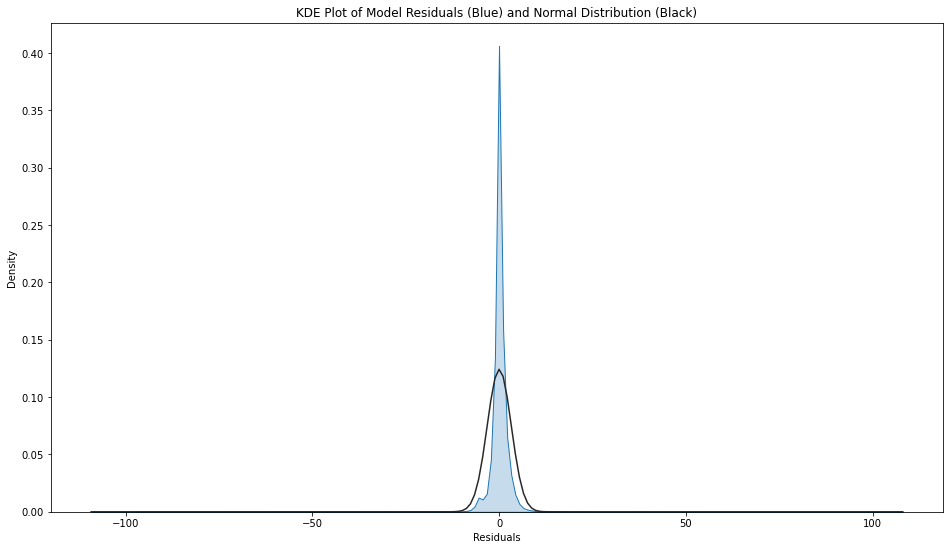

In [ ]:
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

/Users/jairadhakrishnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q Plot')

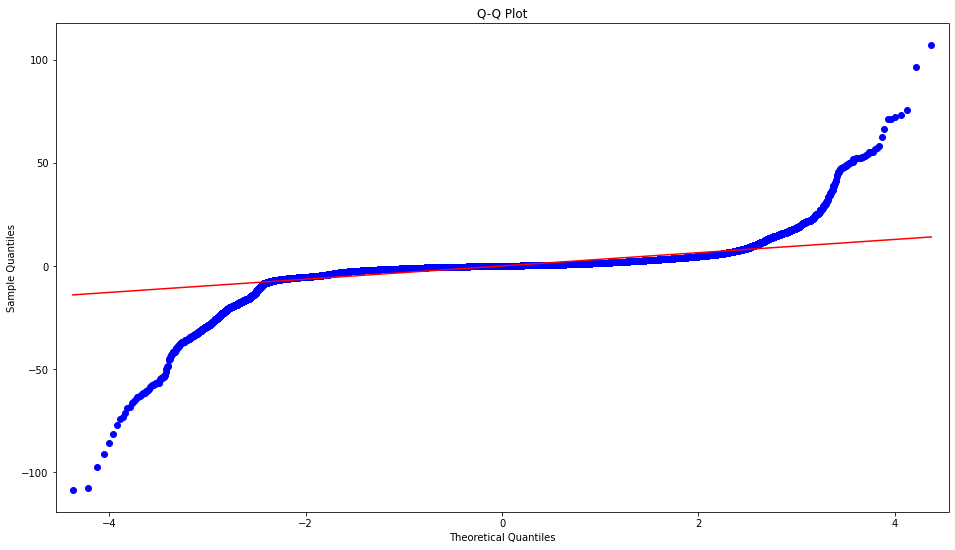

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

Text(0, 0.5, 'Residuals')

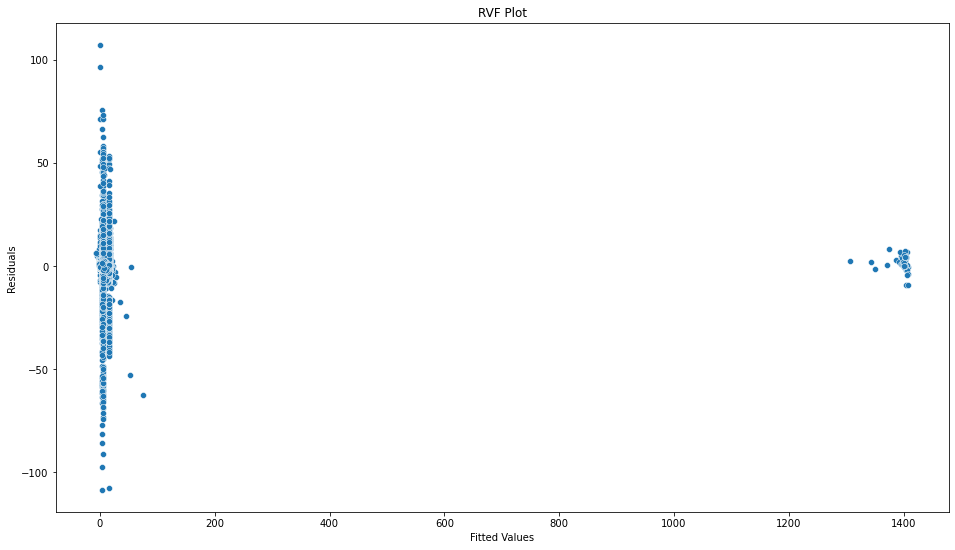

In [ ]:
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

Text(0.5, 0, 'Bus Stop ID')

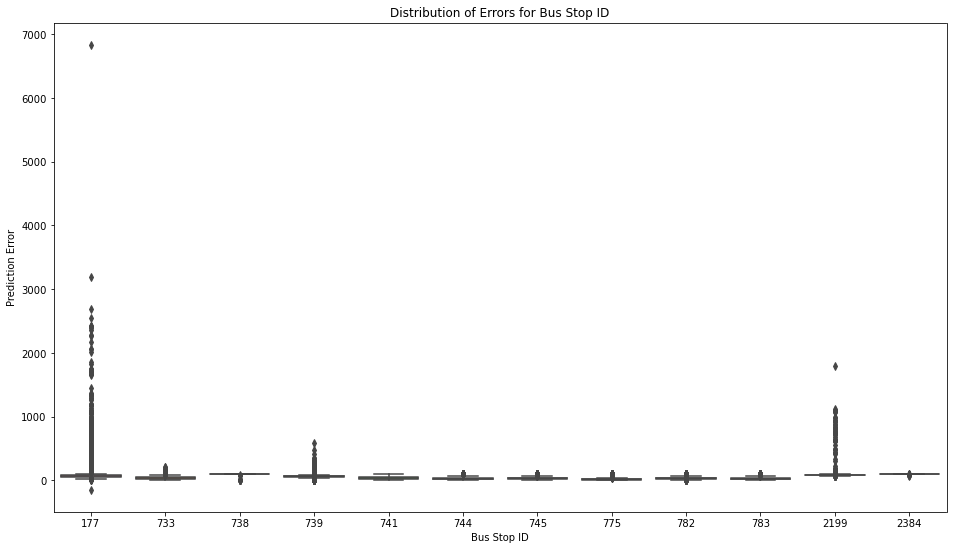

In [ ]:
fig = plt.figure(figsize = (16, 9))

ax = sns.boxplot(x = test['Bus Stop ID'], y = test['Predicted Error'])

ax.set_title("Distribution of Errors for Bus Stop ID")
ax.set_ylabel("Prediction Error")
ax.set_xlabel("Bus Stop ID")


Text(0.5, 0, 'Bus Stop ID')

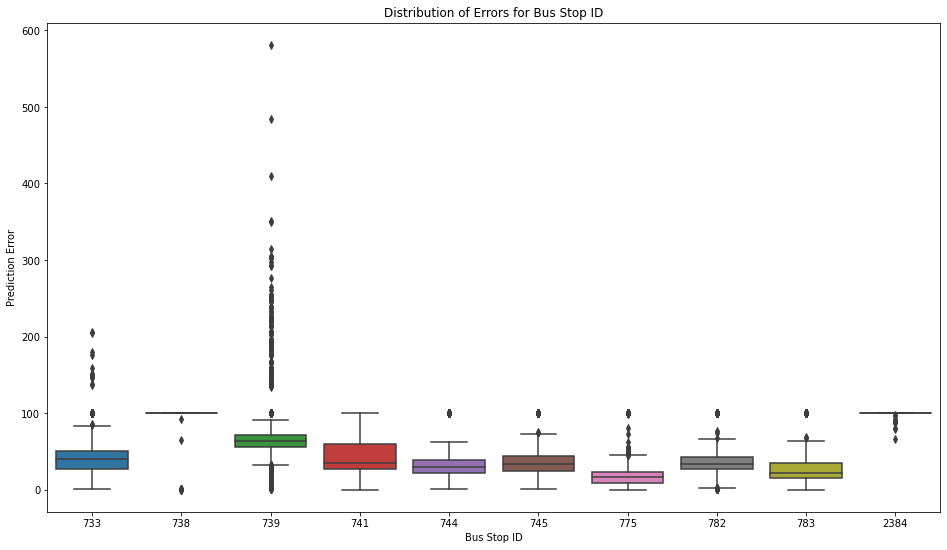

In [ ]:
fig = plt.figure(figsize = (16, 9))
test1 = test.loc[test['Bus Stop ID'] != 177]
test1 = test1.loc[test1['Bus Stop ID'] != 2199]

ax = sns.boxplot(x = test1['Bus Stop ID'], y = test1['Predicted Error'])

ax.set_title("Distribution of Errors for Bus Stop ID")
ax.set_ylabel("Prediction Error")
ax.set_xlabel("Bus Stop ID")


In [ ]:
df3 = df.copy()
df3.fillna(value = -999999)
df3['Prev Departure Offset'] = df3['Prev Departure Offset'].astype(int)
df3['Difference (Minutes)'] = df3['Difference (Minutes)'].astype(int)

df3.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                 'Scheduled Run Time'], axis = 1, inplace=True)

train=df3.sample(frac=0.8)
test=df3.drop(train.index)

model = smf.mixedlm('Q("Prev Departure Offset") ~ Q("Difference (Minutes)") + C(Q("Actual Depart Hour")) + C(Q("Transit Date Month")) + C(Q("Day of Week")) + C(Q("Miles from Prior Time Point"))',data = df3,groups = "Bus Stop ID").fit()
model.summary()
test['Predicted Actual Run Time'] = model.predict(test)

print('Root Mean Squared Error :',math.sqrt(mean_squared_error(test['Actual Run Time'], test['Predicted Actual Run Time'])))
#scores = cross_val_score(model, X_test, Y_test, cv=5)
#print(scores)
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Root Mean Squared Error : 21.830866243462463
